In [124]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib


# Loading data

In [125]:
data = np.genfromtxt('test_scores.csv', delimiter=',')
y_pred = data[1:, 0]
y_test = data[1:, 1]

In [126]:
print("The first 5 elements of y_pred array:", y_pred[:5])
print("The first 5 elements of y_test array:", y_test[:5])

The first 5 elements of y_pred array: [0.66555667 0.64145579 0.29815241 0.23769427 0.35765615]
The first 5 elements of y_test array: [1. 1. 0. 0. 0.]


# Secondary functions

In [127]:
def FPR_FNR_calc(y_test, y_pred):
    TP = 0
    FN = 0
    FP = 0
    TN = 0

    for i in range(len(y_pred)):
        if y_test[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
        if y_pred[i]==1 and y_test[i]!=y_pred[i]:
           FP += 1
        if y_test[i]==y_pred[i]==0:
           TN += 1


    FPR = FP/(FP+TN)
    FNR = FN/(FN + TP)
    return FPR, FNR

In [128]:
def FPR_FNR_lists(y_test, y_pred):
    """
    На вход подаются y_test, y_pred
    Возвращает 2 списка: FPR, FNR
    """
    thresholds = np.linspace(0, 1, num=101)
    FPR_lst = np.empty(len(thresholds))
    FNR_lst = np.empty(len(thresholds))


    for i in range(len(thresholds)):
        y_pred_trnsfrmd = y_pred.copy()
        y_pred_trnsfrmd[y_pred_trnsfrmd > thresholds[i]] = 1.0
        y_pred_trnsfrmd[y_pred_trnsfrmd <= thresholds[i]] = 0.0
        FPR, FNR = FPR_FNR_calc(y_test, y_pred_trnsfrmd)

        FPR_lst[i] = FPR
        FNR_lst[i] = FNR


    return FPR_lst, FNR_lst

In [129]:
def EER_calc(FPR_lst, FNR_lst):
    EER = []

    FPR = FPR_lst[np.nanargmin(np.absolute((FNR_lst - FPR_lst)))]
    FNR = FNR_lst[np.nanargmin(np.absolute((FNR_lst - FPR_lst)))]
    EER.append(FPR)
    EER.append(FNR)

    return EER

# Plot function

In [130]:
def plot_DET_curve(y_pred, y_test):
    FPR_lst, FNR_lst = FPR_FNR_lists(y_pred, y_test)
    EER = EER_calc(FPR_lst, FNR_lst)
    axis_min = min(FPR_lst[0],FNR_lst[-1])
    fig,ax = plt.subplots()
    plt.plot(FPR_lst,FNR_lst)
    plt.yscale('log')
    plt.xscale('log')
    ticks_to_use = [0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50]
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xticks(ticks_to_use)
    ax.set_yticks(ticks_to_use)
    plt.xlabel("FPR (%)")
    plt.ylabel("FNR (%)")
    plt.axis([0.001,50,0.001,50])
    plt.scatter(EER[0], EER[1])

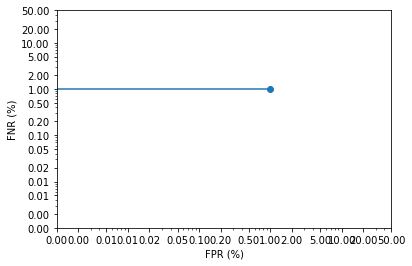

In [131]:
plot_DET_curve(y_pred, y_test)


In [133]:
FNR_lst, FPR_lst = FPR_FNR_lists(y_test, y_pred)
